<a href="https://colab.research.google.com/github/HenryLimaa/JPasEDR-Gaia/blob/master/Pr%C3%A9_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importação das Bibliotecas

O ponto de partida de qualquer análise em Python é a importação das bibliotecas. O código carrega o "canivete suíço" da ciência de dados: pandas para a manipulação de tabelas (DataFrames) , numpy para operações numéricas eficientes , matplotlib e seaborn para a visualização gráfica, e sklearn para ferramentas de aprendizado de máquina.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

## 2. Leitura do Arquivo CSV

Imediatamente após a importação das bibliotecas, ocorre a leitura do arquivo CSV. O comando pd.read_csv  carrega os dados brutos para a memória, armazenando-os na variável df. A contagem de linhas (len(df)) revela a escala do problema: um conjunto de 17.378 estrelas, informação crucial para o planejamento computacional.



In [5]:
# Carregamos o arquivo CSV em um DataFrame do Pandas.

df = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/Conjunto de dados(crossmating JPASEDR-GAIA).csv')

# Contar o número de linhas (excluindo o cabeçalho)
numero_estrelas = len(df)
print(f"O número total de estrelas é: {numero_estrelas}")

O número total de estrelas é: 17378


In [6]:
# Carregamos o arquivo CSV do erro em um DataFrame do Pandas separadamente.


df_err = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/ERR_Conjunto de dados(crossmating JPASEDR-GAIA).csv')

# Contar o número de linhas (excluindo o cabeçalho)
numero_estrelas_err = len(df)
print(f"O número total de estrelas é: {numero_estrelas_err}")

O número total de estrelas é: 17378


## 3. Visualização dos Dados

#### Exibição das Primeiras Linhas do DataFrame

O objetivo deste item é exibir as primeiras linhas do DataFrame para entender sua estrutura. O DataFrame contém colunas como `TILE_ID`, `NUMBER`, `MAG_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe`. A coluna `MAG_APER_COR_3_0` contém múltiplos valores de fotometria em diferentes bandas/momentos. Já o dataframe que possui `TILE_ID`, `NUMBER`, `MAG_ERR_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe` é relacionado ao Vetor de erro para magnitude.

In [7]:
#Exibimos as primeiras linhas do DataFrame para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584


Antes de modificar qualquer dado, é vital inspecioná-lo. Inicialmente realiza-se a visualização das primeiras linhas com df.head(). Esta é uma etapa diagnóstica essencial. A saída revela imediatamente o primeiro desafio de pré-processamento: as colunas MAG_APER_COR_3_0 e MAG_ERR_APER_COR_3_0 não são um valor único, mas sim uma string de texto contendo dezenas de valores de magnitude separados por espaços, o primeirosão os valores propriamente dito das agnitudes e o segundo é o erro por cada uma delas.

In [8]:
#Exibimos as primeiras linhas do DataFrame dos erros para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df_err.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...,1.2200,0.1069,8.762295
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...,0.0947,0.0181,19.112989
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...,1.2176,0.0145,1.190867
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...,0.5735,0.0212,3.696600
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...,0.7961,0.0181,2.273584


## 4. Pré-processamento dos Dados

Neste item, a coluna `MAG_APER_COR_3_0` é dividida em 57 colunas separadas, cada uma contendo um valor de fotometria. Isso é feito usando o método `str.split(expand=True)`, que divide a string em múltiplas colunas com base nos espaços. Após a divisão, os valores são convertidos para numéricos usando `pd.to_numeric`.

O DataFrame resultante tem 63 colunas, incluindo as novas colunas de fotometria (`Fotometria_1`, `Fotometria_2`, etc.). Esse pré-processamento é crucial para análises posteriores, pois permite que cada valor de fotometria seja tratado individualmente.

In [9]:
#As colunas `MAG_APER_COR_3_0` e `MAG_ERR_APER_COR_3_0` contém múltiplos valores separados por espaços. Vamos dividi-las em 57 colunas separadas.
#Criamos uma lista de nomes para as novas colunas em arquivos diferentes.

colunas_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

In [10]:
colunas_err_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

In [11]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [12]:
# Verificar as colunas do DataFrame de erro
print("Colunas do DataFrame de erros:")
print(df_err.columns)

Colunas do DataFrame de erros:
Index(['TILE_ID', 'NUMBER', 'MAG_ERR_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [13]:
#Dividimos as colunas `MAG_APER_COR_3_0` e 'MAG_ERR_APER_COR_3_0' em 57 colunas.
df[colunas_fotometria] = df['MAG_APER_COR_3_0'].str.split(expand=True)

In [14]:
df_err[colunas_err_fotometria] = df_err['MAG_ERR_APER_COR_3_0'].str.split(expand=True)

In [15]:
#Convertemos os valores para numéricos.
df[colunas_fotometria] = df[colunas_fotometria].apply(pd.to_numeric)

In [16]:
df_err[colunas_err_fotometria] = df_err[colunas_err_fotometria].apply(pd.to_numeric)

In [17]:
# 5. Renomear as bandas fotométricas

# Carregar o arquivo CSV com os nomes das bandas
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/804024.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Verificar se temos 57 nomes de banda (para corresponder às 57 colunas de fotometria)
if len(filter_names) == 57:
    # Criar um dicionário para mapear os nomes antigos para os novos
    rename_dict = {f'Fotometria_{i+1}': filter_names[i] for i in range(57)}

    # Renomear as colunas no DataFrame principal
    df = df.rename(columns=rename_dict)
    #df_err = df_err.rename(columns=rename_dict)

    print("Bandas fotométricas renomeadas com sucesso!")
else:
    print(f"Atenção: Número de bandas ({len(filter_names)}) não corresponde ao número de colunas de fotometria (57)")

# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df.head()

Bandas fotométricas renomeadas com sucesso!

DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


In [18]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df_err.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...,1.2200,0.1069,8.762295,0.0497,0.0475,0.0273,0.0151,...,0.0031,0.0029,0.0026,0.0025,0.0025,0.0029,0.0032,0.0029,0.0026,0.0013
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...,0.0947,0.0181,19.112989,0.0059,0.0032,0.0033,0.0018,...,0.0013,0.0027,0.0017,0.0030,0.0023,0.0028,0.0034,0.0017,0.0022,0.0008
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...,1.2176,0.0145,1.190867,0.0065,0.0049,0.0054,0.0025,...,0.0008,0.0017,0.0011,0.0018,0.0014,0.0017,0.0021,0.0011,0.0013,0.0006
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...,0.5735,0.0212,3.696600,0.0076,0.0051,0.0090,0.0028,...,0.0015,0.0025,0.0016,0.0029,0.0022,0.0033,0.0033,0.0017,0.0017,0.0010
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...,0.7961,0.0181,2.273584,0.0053,0.0045,0.0051,0.0026,...,0.0015,0.0020,0.0014,0.0023,0.0017,0.0026,0.0023,0.0012,0.0016,0.0008


Esses blocos executam o "coração" do pré-processamento. O objetivo é "desmembrar" aquela string problemática em colunas numéricas individuais.

Primeiro, uma lista de 57 nomes de colunas genéricos (ex: Fotometria_1, Fotometria_2...) é criada.

Em seguida, o método str.split(expand=True) é aplicado à coluna MAG_APER_COR_3_0. Esta função "fatia" a string em cada espaço, e o expand=True garante que cada valor fatiado se torne uma nova coluna no DataFrame.

Finalmente, o método apply(pd.to_numeric) é usado para converter essas novas colunas, que ainda são texto, em valores numéricos. Sem essa conversão, nenhum cálculo matemático seria possível.



---



---



Com os dados estruturalmente corretos, o foco muda para o "enriquecimento semântico". Com a substituição dos nomes genéricos (ex:Fotometria_1, Fotometria_2, Fotometria_3, etc) pelos nomes científicos reais das bandas fotométricas (ex: uJAVA, J0378, etc.). Isso é feito carregando-se um segundo arquivo CSV (804024.csv) que contém o mapeamento de nomes e aplicando o método df.rename. Esta etapa, embora simples, é crucial para a interpretabilidade científica dos resultados. A seguir, o notebook entra na FASE 1: Verificação de valores nulos



### 4.1 Verificar valores nulos, NA, NaN em todas as bandas

In [19]:
print("=" * 60)
print("FASE 1: Verificação de valores nulos/ausentes")
print("=" * 60)

# Verificar valores nulos/ausentes padrão do pandas
valores_ausentes_por_banda = df[filter_names].isnull().sum()

print("\nValores ausentes (NaN/None) por banda:")
print(valores_ausentes_por_banda)

# Verificar também valores específicos como 99 (que podem representar dados ausentes)
print("\nValores 99 por banda:")
for banda in filter_names:
    # Contar valores exatamente igual a 99 na banda
    count_99 = (df[banda] == 99).sum()
    print(f"{banda}: {count_99}")

FASE 1: Verificação de valores nulos/ausentes

Valores ausentes (NaN/None) por banda:
uJAVA    0
J0378    0
J0390    0
J0400    0
J0410    0
J0420    0
J0430    0
J0440    0
J0450    0
J0460    0
J0470    0
J0480    0
J0490    0
J0500    0
J0510    0
J0520    0
J0530    0
J0540    0
J0550    0
J0560    0
J0570    0
J0580    0
J0590    0
J0600    0
J0610    0
J0620    0
J0630    0
J0640    0
J0650    0
J0660    0
J0670    0
J0680    0
J0690    0
J0700    0
J0710    0
J0720    0
J0730    0
J0740    0
J0750    0
J0760    0
J0770    0
J0780    0
J0790    0
J0800    0
J0810    0
J0820    0
J0830    0
J0840    0
J0850    0
J0860    0
J0870    0
J0880    0
J0890    0
J0900    0
J0910    0
J1007    0
iSDSS    0
dtype: int64

Valores 99 por banda:
uJAVA: 0
J0378: 0
J0390: 0
J0400: 0
J0410: 0
J0420: 0
J0430: 0
J0440: 0
J0450: 0
J0460: 0
J0470: 0
J0480: 0
J0490: 0
J0500: 0
J0510: 0
J0520: 0
J0530: 0
J0540: 0
J0550: 0
J0560: 0
J0570: 0
J0580: 0
J0590: 0
J0600: 0
J0610: 0
J0620: 0
J0630: 0
J0640: 0

Em astronomia, dados ausentes podem ser representados por valores padrão (NaN, None) ou por placeholders (valores sentinela), como 99. O código, de forma prudente, verifica ambos:



1.   df[filter_names].isnull().sum()  procura por NaN ou None. A saída mostra 0 para todas as bandas .
2.   Um laço for verifica explicitamente a contagem de valores == 99. A saída também retorna 0 para todas as bandas.

A vantagem desta verificação dupla é a robustez. A desvantagem de não encontrar valores nulos é estatisticamente improvável em dados reais, o que pode sugerir que um filtro de limpeza já foi aplicado na origem dos dados, ou que o valor 99 foi apenas um exemplo e outros placeholders (como -99 ou 99.99) poderiam existir.



### 4.2 Calcular SNR (Signal-to-Noise Ratio) para cada banda

Esta seção é o objetivo final do pré-processamento: avaliar a qualidade dos dados.

FASE 2: Geração do Indicador. O código calcula a Relação Sinal-Ruído (SNR). O SNR é a métrica fundamental da qualidade de uma medição; valores altos indicam um sinal limpo, valores baixos indicam um sinal ruidoso.

In [20]:
print("=" * 60)
print("FASE 2: Cálculo do SNR para cada banda")
print("=" * 60)

# SNR = 10^(-0.4 * (magnitude - magnitude_zero)) / noise_estimate
# Para simplificar, vamos calcular SNR baseado na magnitude (SNR ∝ 1/10^(0.4*mag))

# Vamos calcular um SNR aproximado baseado na magnitude
# Quanto menor a magnitude, mais brilhante a estrela e maior o SNR
snr_por_banda = {}

for banda in filter_names:
    if banda != 'iSDSS':  # Ignorar banda iSDSS conforme solicitado
        magnitude = df[banda]

        # SNR aproximado: assumindo que o ruído é proporcional à magnitude
        # Esta é uma simplificação - em casos reais, precisaríamos dos erros de medição
        snr_aproximado = 100 * 10**(-0.4 * (magnitude - 15))  # Fator de escala arbitrário

        snr_por_banda[banda] = snr_aproximado

        # Adicionar ao DataFrame
        df[f'SNR_{banda}'] = snr_aproximado

print("Cálculo do SNR concluído!")

# Exibir estatísticas básicas do SNR
print("\nEstatísticas do SNR por banda:")
for banda in list(snr_por_banda.keys())[:5]:  # Mostrar apenas as primeiras 5 para não poluir
    snr_values = snr_por_banda[banda]
    print(f"{banda}: min={snr_values.min():.2f}, max={snr_values.max():.2f}, mean={snr_values.mean():.2f}")

FASE 2: Cálculo do SNR para cada banda
Cálculo do SNR concluído!

Estatísticas do SNR por banda:
uJAVA: min=0.00, max=11076.43, mean=40.08
J0378: min=0.00, max=11545.16, mean=44.13
J0390: min=0.00, max=8379.15, mean=44.24
J0400: min=0.00, max=7509.31, mean=59.92
J0410: min=0.00, max=7655.97, mean=72.04


É crucial notar que o código implementa uma aproximação do SNR, como indicado nos comentários. A fórmula snr_aproximado = 100 * 10**(-0.4 * (magnitude - 15))  é uma heurística que assume que o ruído é proporcional à magnitude, centrando o SNR "100" em torno da magnitude 15.



Vantagem: É uma forma extremamente rápida de estimar a qualidade relativa das medições sem necessitar das colunas de erro de cada banda (que não estão presentes para as 57 bandas).

Desvantagem: Não é o SNR científico verdadeiro, que exigiria a propagação de erro formal.

O SNR de cada banda é então salvo como uma nova coluna (ex: SNR_uJAVA) no DataFrame.

### 4.3 Histograma do sinal/ruído de cada banda

FASE 3: Visualização dos Dados, tenta a primeira abordagem de visualização: plotar os histogramas de SNR para todas as 56 bandas (excluindo iSDSS ) em um grande painel de subplots. O resultado, embora completo, é visualmente poluído e difícil de inspecionar individualmente.


FASE 3: Histogramas do SNR para cada banda


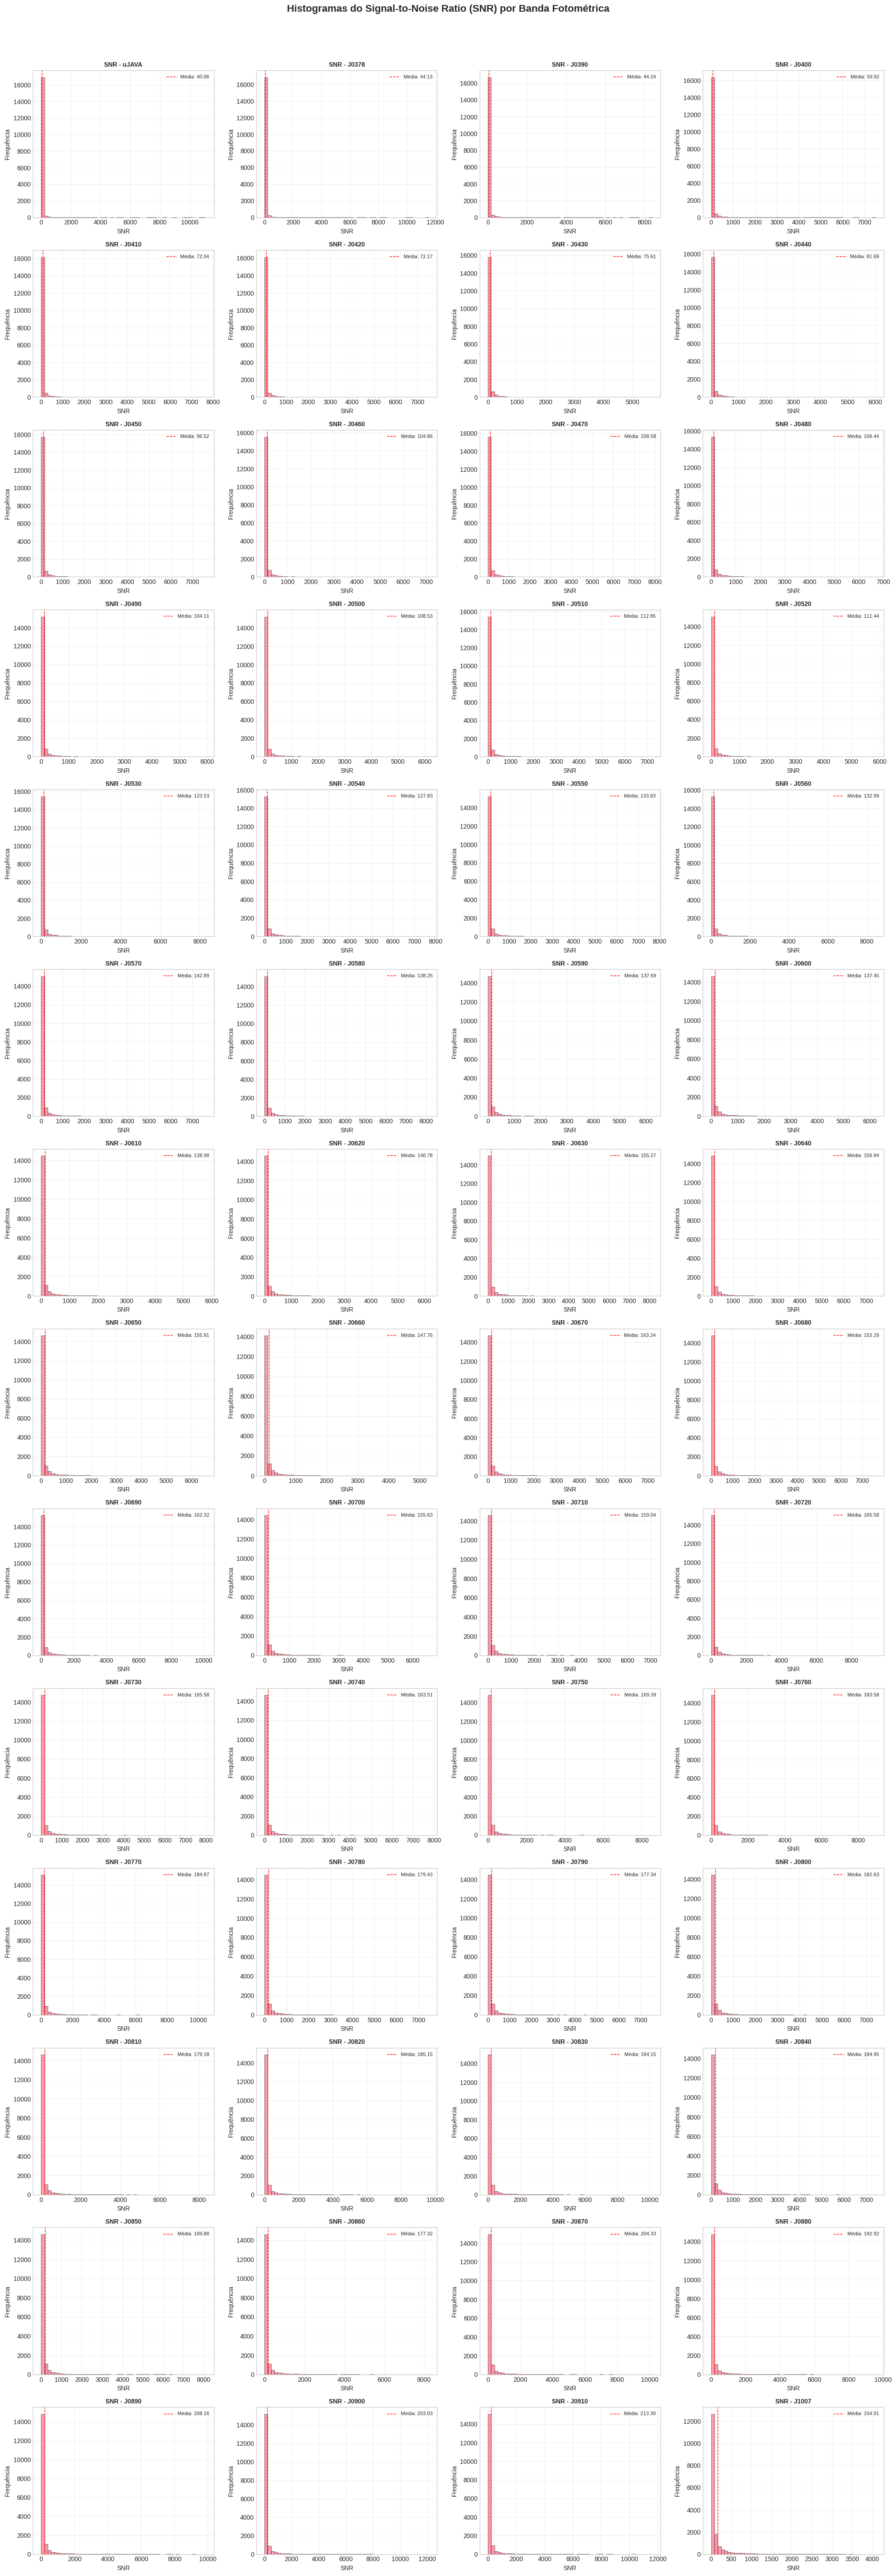

In [21]:
print("\n" + "=" * 60)
print("FASE 3: Histogramas do SNR para cada banda")
print("=" * 60)

# Configurar o estilo dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Criar histogramas para cada banda (exceto iSDSS)
bandas_para_plotar = [banda for banda in filter_names if banda != 'iSDSS']

# Calcular layout para subplots
n_bandas = len(bandas_para_plotar)
n_cols = 4  # 4 colunas
n_rows = (n_bandas + n_cols - 1) // n_cols  # Arredondar para cima

# Criar figura com subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()  # Achatar o array de eixos para facilitar iteração

# Plotar histogramas
for i, banda in enumerate(bandas_para_plotar):
    snr_values = snr_por_banda[banda]

    axes[i].hist(snr_values, bins=50, alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[i].set_title(f'SNR - {banda}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel('SNR')
    axes[i].set_ylabel('Frequência')
    axes[i].grid(True, alpha=0.3)

    # Adicionar linhas verticais para estatísticas
    mean_snr = snr_values.mean()
    axes[i].axvline(mean_snr, color='red', linestyle='--', linewidth=1, label=f'Média: {mean_snr:.2f}')
    axes[i].legend(fontsize=8)

# Ocultar eixos vazios
for j in range(len(bandas_para_plotar), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Histogramas do Signal-to-Noise Ratio (SNR) por Banda Fotométrica',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

No trecho seguinte, apresenta uma solução muito mais elegante e interativa para esse problema. Ele redefine a FASE 3:



*   **Interatividade:** O código lista todas as bandas disponíveis e solicita ativamente que o usuário digite os números das bandas que deseja analisar (ex: "45,7,39").
*   **Robustez:** Utiliza threading para criar um timeout de 5 minutos. Se o usuário não responder, o script não trava; ele seleciona 3 bandas aleatoriamente e continua.
*   **Análise Focada:** Ele então plota histogramas limpos apenas para as bandas selecionadas, incluindo linhas de média e mediana.
*   **Relatório Detalhado:** Por fim, imprime estatísticas descritivas (mínimo, máximo, média, mediana, desvio padrão) apenas para as bandas selecionadas.

Esta abordagem interativa é uma grande vantagem para a análise exploratória, permitindo ao cientista focar em bandas de interesse específico (ex: J0810, J0430, J0750)


FASE 3: Histogramas do SNR para cada banda

SELECIONE ATÉ 10 BANDAS PARA VISUALIZAR

Bandas disponíveis:
 1. uJAVA
 2. J0378
 3. J0390
 4. J0400
 5. J0410
 6. J0420
 7. J0430
 8. J0440
 9. J0450
10. J0460
11. J0470
12. J0480
13. J0490
14. J0500
15. J0510
16. J0520
17. J0530
18. J0540
19. J0550
20. J0560
21. J0570
22. J0580
23. J0590
24. J0600
25. J0610
26. J0620
27. J0630
28. J0640
29. J0650
30. J0660
31. J0670
32. J0680
33. J0690
34. J0700
35. J0710
36. J0720
37. J0730
38. J0740
39. J0750
40. J0760
41. J0770
42. J0780
43. J0790
44. J0800
45. J0810
46. J0820
47. J0830
48. J0840
49. J0850
50. J0860
51. J0870
52. J0880
53. J0890
54. J0900
55. J0910
56. J1007

Instruções:
- Digite os números das bandas separados por vírgula (ex: 1,3,5)
- Máximo de 10 bandas
- Tempo limite: 5 minutos
- Após o tempo limite, 3 bandas serão selecionadas aleatoriamente

Digite sua seleção: 3, 45, 50

Bandas selecionadas: ['J0390', 'J0810', 'J0860']

Bandas que serão plotadas: ['J0390', 'J0810', 'J0860']


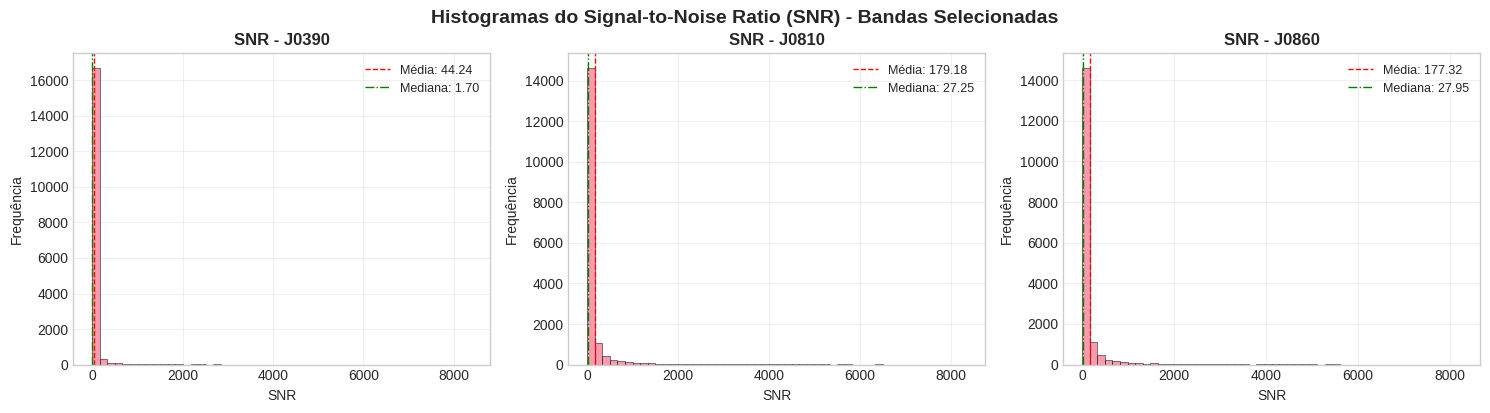


ESTATÍSTICAS DAS BANDAS SELECIONADAS

J0390:
  Mínimo: 0.00
  Máximo: 8379.15
  Média: 44.24
  Mediana: 1.70
  Desvio Padrão: 288.99

J0810:
  Mínimo: 0.01
  Máximo: 8325.30
  Média: 179.18
  Mediana: 27.25
  Desvio Padrão: 584.30

J0860:
  Mínimo: 0.02
  Máximo: 8248.98
  Média: 177.32
  Mediana: 27.95
  Desvio Padrão: 573.23

Total de 3 bandas plotadas com sucesso!


In [22]:
print("\n" + "=" * 60)
print("FASE 3: Histogramas do SNR para cada banda")
print("=" * 60)

# Configurar o estilo dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Criar lista de bandas disponíveis (exceto iSDSS)
bandas_para_plotar = [banda for banda in filter_names if banda != 'iSDSS']

# Função para seleção de bandas com timeout
def selecionar_bandas_com_timeout(bandas_disponiveis, timeout=300):  # 5 minutos = 300 segundos
    import threading
    import time

    bandas_selecionadas = []
    selecao_concluida = threading.Event()

    def obter_selecao_usuario():
        nonlocal bandas_selecionadas

        print("\n" + "=" * 50)
        print("SELECIONE ATÉ 10 BANDAS PARA VISUALIZAR")
        print("=" * 50)
        print("\nBandas disponíveis:")
        for i, banda in enumerate(bandas_disponiveis, 1):
            print(f"{i:2d}. {banda}")

        print(f"\nInstruções:")
        print("- Digite os números das bandas separados por vírgula (ex: 1,3,5)")
        print("- Máximo de 10 bandas")
        print(f"- Tempo limite: {timeout//60} minutos")
        print("- Após o tempo limite, 3 bandas serão selecionadas aleatoriamente")

        try:
            entrada = input("\nDigite sua seleção: ").strip()
            if entrada:
                indices = [int(x.strip()) - 1 for x in entrada.split(',')]
                bandas_selecionadas = [bandas_disponiveis[i] for i in indices
                                     if 0 <= i < len(bandas_disponiveis)]

                # Limitar a 10 bandas
                bandas_selecionadas = bandas_selecionadas[:10]

                if bandas_selecionadas:
                    print(f"\nBandas selecionadas: {bandas_selecionadas}")
                else:
                    print("\nNenhuma banda válida selecionada. Usando seleção aleatória.")
                    bandas_selecionadas = list(np.random.choice(bandas_disponiveis,
                                                              size=min(3, len(bandas_disponiveis)),
                                                              replace=False))
        except (ValueError, IndexError) as e:
            print(f"\nEntrada inválida. Erro: {e}")
            print("Selecionando bandas aleatoriamente...")
            bandas_selecionadas = list(np.random.choice(bandas_disponiveis,
                                                      size=min(3, len(bandas_disponiveis)),
                                                      replace=False))

        selecao_concluida.set()

    # Iniciar thread para entrada do usuário
    input_thread = threading.Thread(target=obter_selecao_usuario)
    input_thread.daemon = True
    input_thread.start()

    # Aguardar com timeout
    selecao_concluida.wait(timeout=timeout)

    # Se timeout ocorrer e nenhuma seleção foi feita
    if not bandas_selecionadas and not selecao_concluida.is_set():
        print(f"\nTempo limite de {timeout//60} minutos atingido.")
        print("Selecionando 3 bandas aleatoriamente...")
        bandas_selecionadas = list(np.random.choice(bandas_disponiveis,
                                                  size=min(3, len(bandas_disponiveis)),
                                                  replace=False))

    return bandas_selecionadas

# Selecionar bandas
bandas_selecionadas = selecionar_bandas_com_timeout(bandas_para_plotar)

print(f"\nBandas que serão plotadas: {bandas_selecionadas}")

# Se nenhuma banda foi selecionada, usar algumas aleatórias
if not bandas_selecionadas:
    print("Nenhuma banda selecionada. Usando 3 bandas aleatórias...")
    bandas_selecionadas = list(np.random.choice(bandas_para_plotar,
                                              size=min(3, len(bandas_para_plotar)),
                                              replace=False))

# Calcular layout para subplots
n_bandas = len(bandas_selecionadas)
n_cols = min(3, n_bandas)  # Máximo de 3 colunas
n_rows = (n_bandas + n_cols - 1) // n_cols  # Arredondar para cima

# Criar figura com subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
if n_bandas > 1:
    axes = axes.flatten()  # Achatar o array de eixos para facilitar iteração
else:
    axes = [axes]  # Garantir que seja uma lista mesmo com apenas 1 subplot

# Plotar histogramas apenas para as bandas selecionadas
for i, banda in enumerate(bandas_selecionadas):
    if i < len(axes):  # Garantir que não ultrapasse o número de eixos
        snr_values = snr_por_banda[banda]

        axes[i].hist(snr_values, bins=50, alpha=0.7, edgecolor='black', linewidth=0.5)
        axes[i].set_title(f'SNR - {banda}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('SNR')
        axes[i].set_ylabel('Frequência')
        axes[i].grid(True, alpha=0.3)

        # Adicionar linhas verticais para estatísticas
        mean_snr = snr_values.mean()
        median_snr = snr_values.median()
        axes[i].axvline(mean_snr, color='red', linestyle='--', linewidth=1, label=f'Média: {mean_snr:.2f}')
        axes[i].axvline(median_snr, color='green', linestyle='-.', linewidth=1, label=f'Mediana: {median_snr:.2f}')
        axes[i].legend(fontsize=9)

# Ocultar eixos vazios
for j in range(len(bandas_selecionadas), len(axes)):
    if j < len(axes):
        axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle(f'Histogramas do Signal-to-Noise Ratio (SNR) - Bandas Selecionadas',
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Estatísticas das bandas selecionadas
print("\n" + "=" * 50)
print("ESTATÍSTICAS DAS BANDAS SELECIONADAS")
print("=" * 50)

for banda in bandas_selecionadas:
    snr_values = snr_por_banda[banda]
    print(f"\n{banda}:")
    print(f"  Mínimo: {snr_values.min():.2f}")
    print(f"  Máximo: {snr_values.max():.2f}")
    print(f"  Média: {snr_values.mean():.2f}")
    print(f"  Mediana: {snr_values.median():.2f}")
    print(f"  Desvio Padrão: {snr_values.std():.2f}")

print(f"\nTotal de {len(bandas_selecionadas)} bandas plotadas com sucesso!")

#### **Visualização Comparativa e Sumarização**
Para complementar a análise focada, o bloco a seguir oferece duas visualizações globais:

*   **Boxplots (Visualização Alternativa):** O primeiro gráfico é um boxplot da distribuição de SNR para todas as bandas, lado a lado. Esta é uma ferramenta visual superior aos 56 histogramas, pois permite uma comparação direta das medianas (centro da caixa), da dispersão (tamanho da caixa) e dos outliers (pontos) entre as diferentes bandas.
*   **Estatísticas Resumidas:** Finalmente, o código calcula as estatísticas descritivas do SNR para todas as bandas e as armazena em um novo DataFrame, snr_stats_df. A impressão desta tabela é o produto final quantitativo da análise, resumindo o desempenho de cada filtro fotométrico.









VISUALIZAÇÃO ALTERNATIVA: Boxplots do SNR por banda


/tmp/ipython-input-2623030307.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(snr_data, labels=banda_labels)


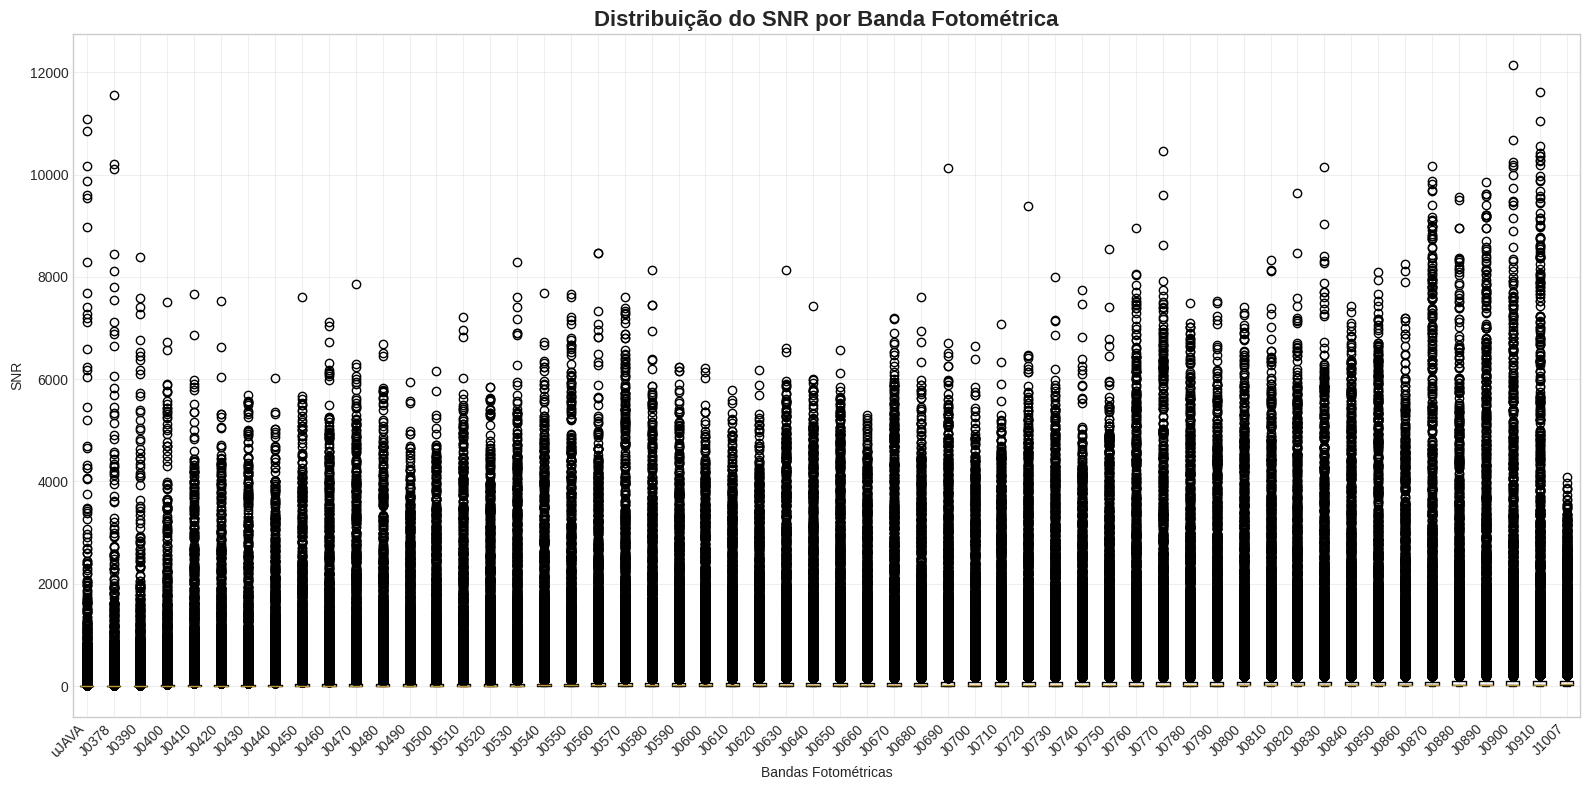


ESTATÍSTICAS RESUMIDAS DO SNR
    Banda  SNR_Mínimo  SNR_Máximo  SNR_Mediano  SNR_Médio  SNR_Desvio_Padrão
0   uJAVA        0.00    11076.43         1.48      40.08             321.20
1   J0378        0.00    11545.16         1.56      44.13             315.24
2   J0390        0.00     8379.15         1.70      44.24             288.99
3   J0400        0.00     7509.31         2.99      59.92             321.60
4   J0410        0.00     7655.97         4.29      72.04             342.88
5   J0420        0.00     7523.15         4.27      72.17             337.10
6   J0430        0.00     5691.15         4.64      75.61             359.24
7   J0440        0.00     6014.51         6.05      81.69             345.68
8   J0450        0.01     7613.77         7.63      96.52             400.81
9   J0460        0.01     7118.69         8.61     104.86             436.73
10  J0470        0.02     7863.21         9.03     108.58             446.98
11  J0480        0.04     6686.52         9.1

In [23]:
print("\n" + "=" * 60)
print("VISUALIZAÇÃO ALTERNATIVA: Boxplots do SNR por banda")
print("=" * 60)

# Preparar dados para boxplot
snr_data = []
banda_labels = []

for banda in bandas_para_plotar:
    snr_data.append(snr_por_banda[banda])
    banda_labels.append(banda)

plt.figure(figsize=(16, 8))
plt.boxplot(snr_data, labels=banda_labels)
plt.title('Distribuição do SNR por Banda Fotométrica', fontsize=16, fontweight='bold')
plt.xlabel('Bandas Fotométricas')
plt.ylabel('SNR')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Estatísticas resumidas
print("\n" + "=" * 60)
print("ESTATÍSTICAS RESUMIDAS DO SNR")
print("=" * 60)

# Criar DataFrame com estatísticas do SNR
snr_stats = []
for banda in bandas_para_plotar:
    snr_values = snr_por_banda[banda]
    snr_stats.append({
        'Banda': banda,
        'SNR_Mínimo': snr_values.min(),
        'SNR_Máximo': snr_values.max(),
        'SNR_Mediano': snr_values.median(),
        'SNR_Médio': snr_values.mean(),
        'SNR_Desvio_Padrão': snr_values.std()
    })

snr_stats_df = pd.DataFrame(snr_stats)
print(snr_stats_df.round(2))

print("\nPré-processamento e análise de SNR concluídos!")